# **Credit Card Usage Segmentation**

This project focuses on developing unsupervised learning models for customer segmentation based on credit card usage data. The models aim to provide insights into distinct customer segments, improve credit risk assessment, and optimize marketing strategies. Deliverables include segmentation models, comprehensive data visualizations, and a comparative analysis of various algorithms.

Import necessary libraries

In [231]:
#Libraries for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#for preprocessing, clustering, PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [232]:
#load the data
from google.colab import drive
drive.mount('/content/drive')

import os
os.getcwd()
os.chdir('/content/drive/MyDrive/DATA SCIENCE PROJECT/Credit Card Usage Segmentation')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset and review the features to understand their distributions, ranges, and relationships.

In [233]:
#import Customer Data.csv
df = pd.read_csv('Customer Data.csv', index_col = 'CUST_ID')

In [234]:
#Data Exploration
df.shape

(8950, 17)

In [235]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

In [236]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

Check for missing values, outliers, and any anomalies.

In [238]:
df.isnull().sum() #Check for missing values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There's 1 missing value in Credit Limit
and 313 missing values in Minimum Payments

In [239]:
df.duplicated().sum() #Check for duplicates

0

There's no duplicates in the dataset.

Handle the missing values.

The missing value in CREDIT_LIMIT can be droped since it's only 1.

In [240]:
df.dropna(subset = ['CREDIT_LIMIT'], inplace = True) #Drop Credit limit missing value since there's only 1 missing value

For the missing values in MINIMUM_PAYMENTS:

In [241]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()] #display PAYMENTS and MINIMUM_PAYMENTS

PAYMENTS  MINIMUM_PAYMENTS
CUST_ID                              
C10004     0.000000               NaN
C10047     0.000000               NaN
C10049     0.000000               NaN
C10056   417.016763               NaN
C10057     0.000000               NaN
...             ...               ...
C19160     0.000000               NaN
C19170     0.000000               NaN
C19176     0.000000               NaN
C19185     0.000000               NaN
C19187   275.861322               NaN

[313 rows x 2 columns]

Since customers that don't have payments won't have minimum payment entry, if PAYMENTS = 0 then MINIMUM PAYMENTS = 0

In [242]:
#look for missing values with PAYMENTS above MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].head()

Shape: (6272, 2)


PAYMENTS  MINIMUM_PAYMENTS
CUST_ID                               
C10001    201.802084        139.509787
C10002   4103.032597       1072.340217
C10005    678.334763        244.791237
C10007   6354.314328        198.065894
C10008    679.065082        532.033990

In [243]:
#look for missing values with PAYMENTS below MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].head()

Shape: (2364, 2)


PAYMENTS  MINIMUM_PAYMENTS
CUST_ID                               
C10003    622.066742        627.284787
C10006   1400.057770       2407.246035
C10011   1083.301007       2172.697765
C10015    805.647974        989.962866
C10016   1993.439277       2109.906490

Payments should be completed if PAYMENTS is greater than MINIMUM_PAYMENT 2364 customers failed to paid below MINIMUM_PAYMENT which lead to invalid values

Therefore, fill the missing values by the mean of PAYMENTS if PAYMENTS is less than MINIMUM_PAYMENTS, the missing values will be filled by the correspond PAYMENTS




In [244]:
minimum_copy = df['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
payments_mean = np.mean(df['PAYMENTS']) # take the mean value of PAYMENTS

i = 0
for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minimum_copy[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True):
        minimum_copy[i] = payments
    elif minpayments == True:
        minimum_copy[i] = payments_mean
    i += 1

df['MINIMUM_PAYMENTS'] = minimum_copy.copy()

In [245]:
#final check of missing values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Feature Scaling ( log scaler & MinMax Scaler )**

Log transformation reduces skewness and compresses extreme values, but it doesn’t standardize the data to a particular range. Applying Min-Max scaling afterward can bring all features into a common range (typically 0 to 1), making them easier to interpret and ensuring they contribute equally to distance calculations in algorithms like K-Means.



In [246]:
# log scale is often an effective way to handle outliers, especially for features with skewed distributions.
logscaled_df = np.log2(df + 0.01)
logscaled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                              
C10001    5.354408          -0.271980   6.576069         -6.643856   
C10002   11.644973          -0.121720  -6.643856         -6.643856   
C10003   11.284916           0.014355   9.594661          9.594661   
C10004   10.702762          -0.629581  10.549794         10.549794   
C10005    9.675471           0.014355   4.000901          4.000901   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                 6.576069     -6.643856            -2.500896   
C10002                -6.643856     12.653507            -6.643856   
C10003                -6.643856     -6.643856             0.014355   
C10004                -6.643856      7.685085            -3.421469   
C10005                -6.643856     -6.643856            -3.421469   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                    -6.643856                         -3.421469   
C10002                    -6.643856                         -6.643856   
C10003                     0.014355                         -6.643856   
C10004                    -3.421469                         -6.643856   
C10005                    -3.421469                         -6.643856   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                -6.643856         -6.643856       1.007196   
C10002                -1.943416          2.003602      -6.643856   
C10003                -6.643856         -6.643856       3.586164   
C10004                -3.421469          0.014355       0.014355   
C10005                -6.643856         -6.643856       0.014355   

         CREDIT_LIMIT   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
CUST_ID                                                                         
C10001       9.965799   7.656869          7.124326         -6.643856  3.586164  
C10002      12.773141  12.002478         10.066560         -2.106423  3.586164  
C10003      12.872677   9.280949          9.293000         -6.643856  3.586164  
C10004      12.872677  -6.643856         -6.643856         -6.643856  3.586164  
C10005      10.228831   9.405875          7.935467         -6.643856  3.586164

In [247]:
minmax_scaler = MinMaxScaler().fit_transform(logscaled_df)

**Exploratory Data Analysis (EDA)**

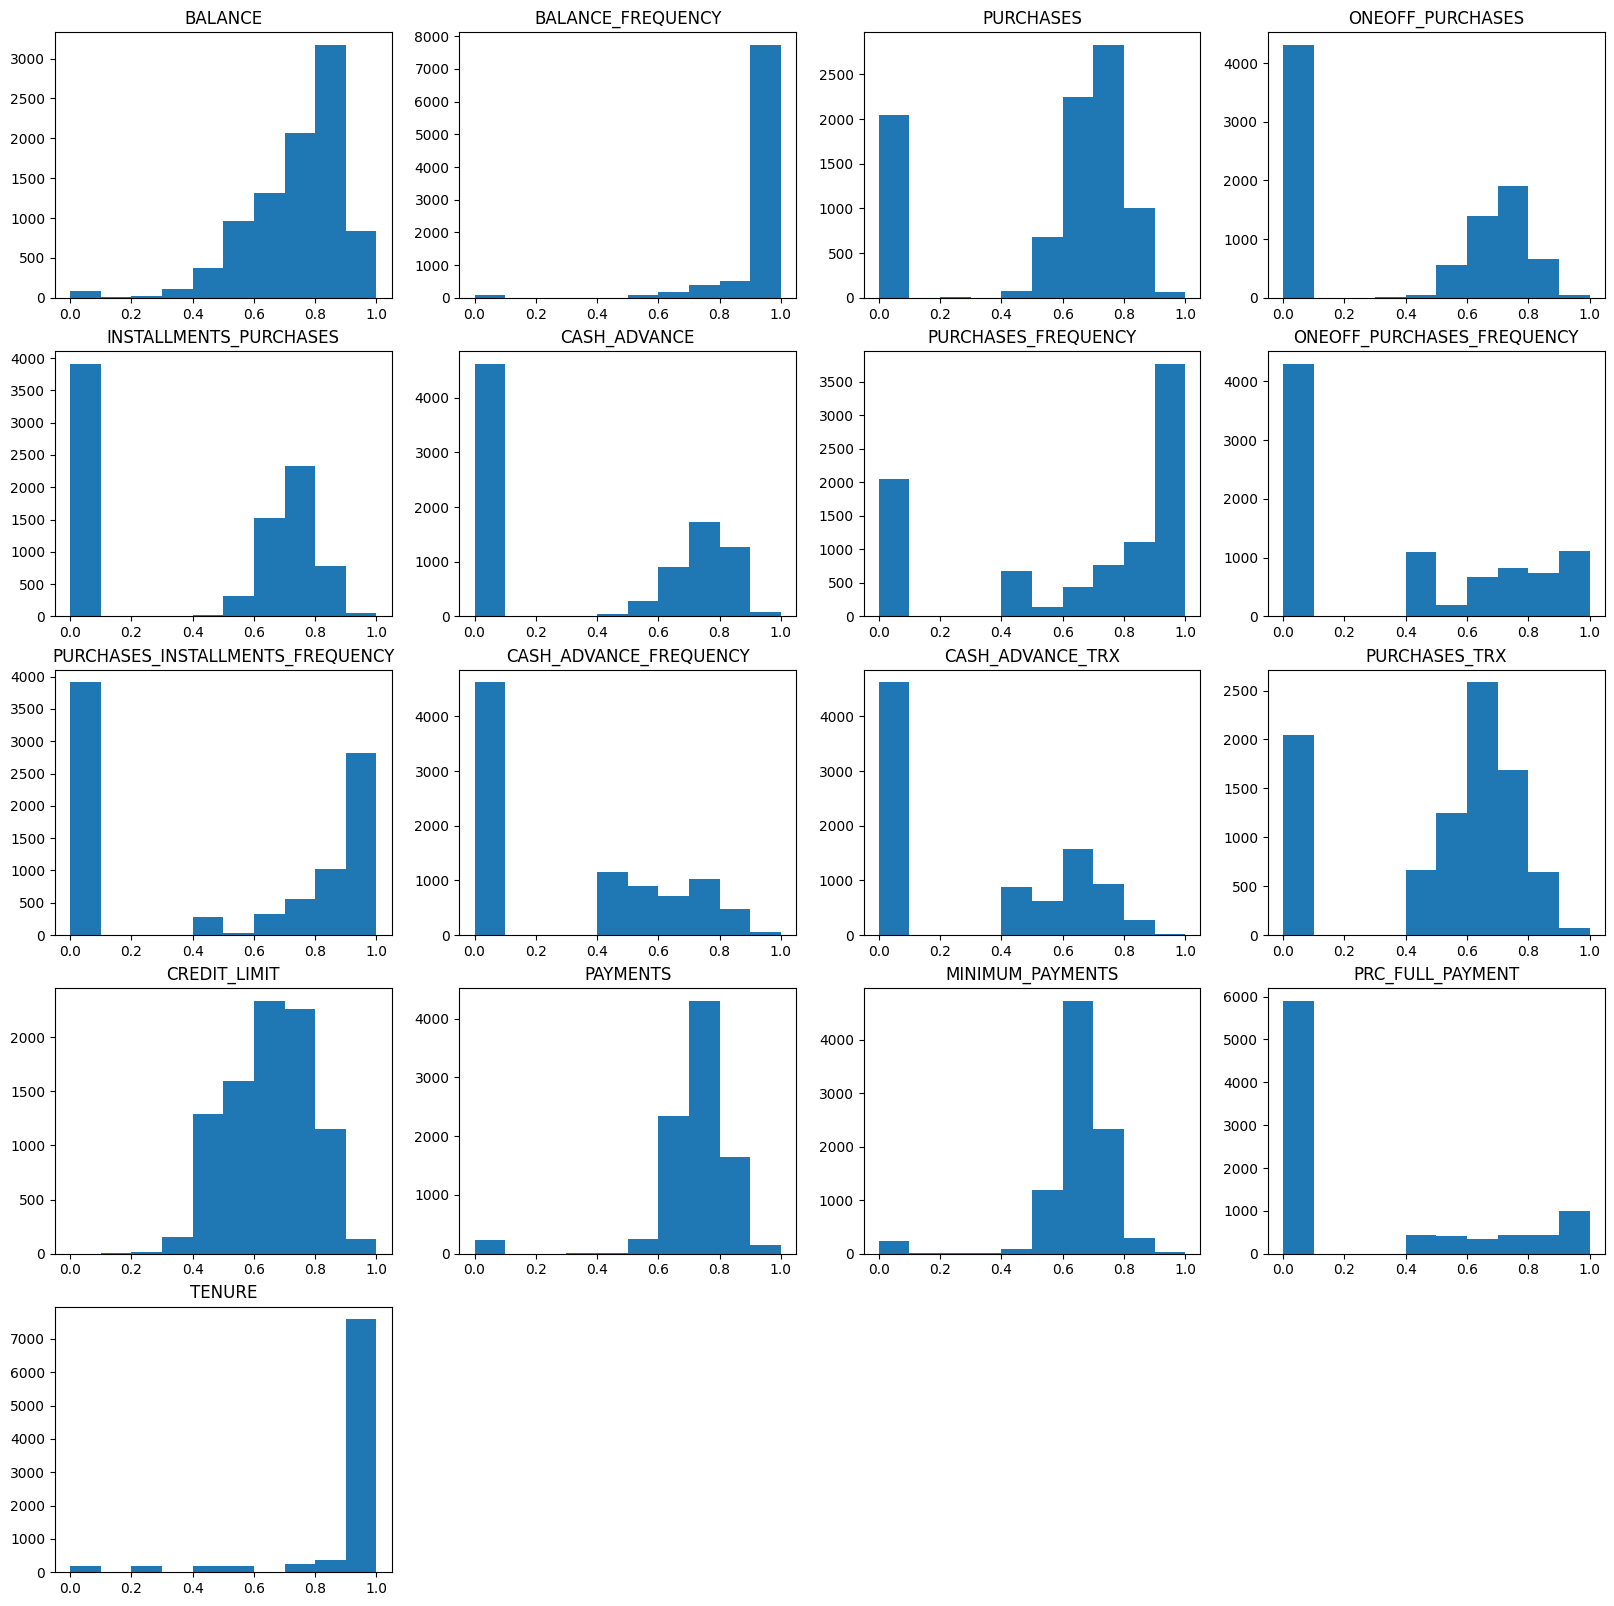

In [248]:
minmax_scaler_df = pd.DataFrame(minmax_scaler, columns=df.columns) # Convert the NumPy array to a pandas DataFrame to use .iloc
fig, axs = plt.subplots(nrows=5, ncols=4, figsize = (20,20))

z = 0
for i in range(5):
    for j in range(4):
        if z > 16:
            axs[i][j].axis(False)
        else:
            axs[i][j].set_title(minmax_scaler_df.iloc[:,z].name)
            axs[i][j].hist(minmax_scaler_df.iloc[:,z])
        z+=1

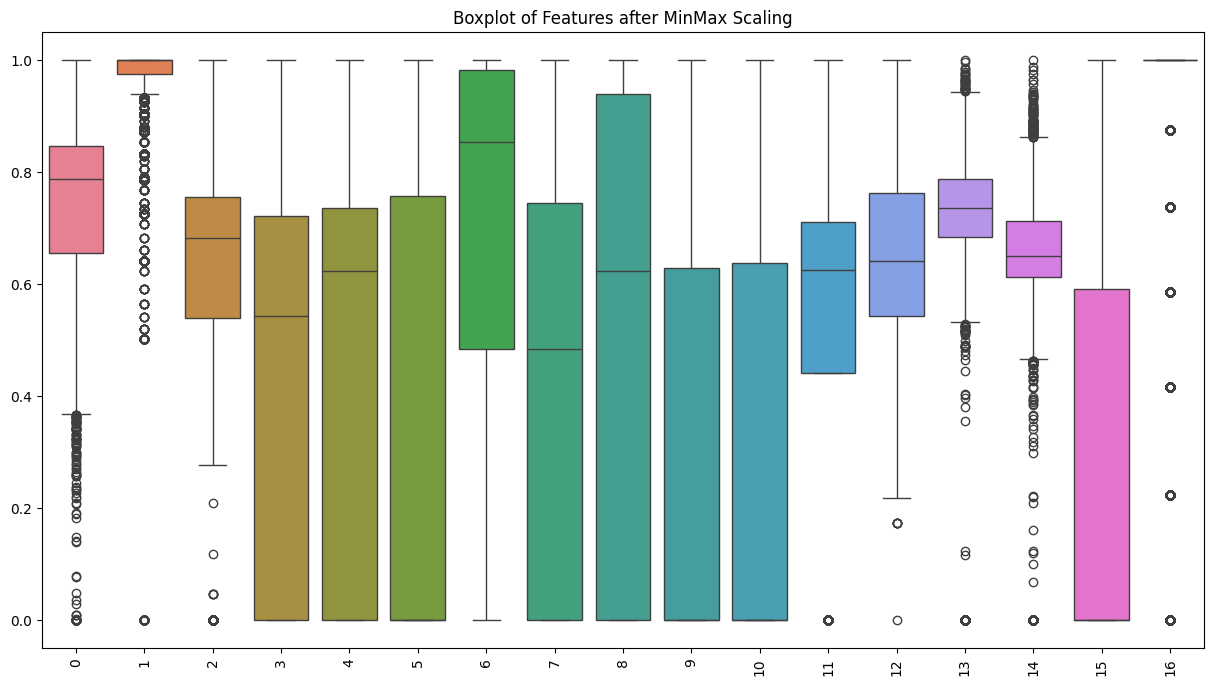

In [249]:
# Create the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=minmax_scaler)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.title('Boxplot of Features after MinMax Scaling')
plt.show()

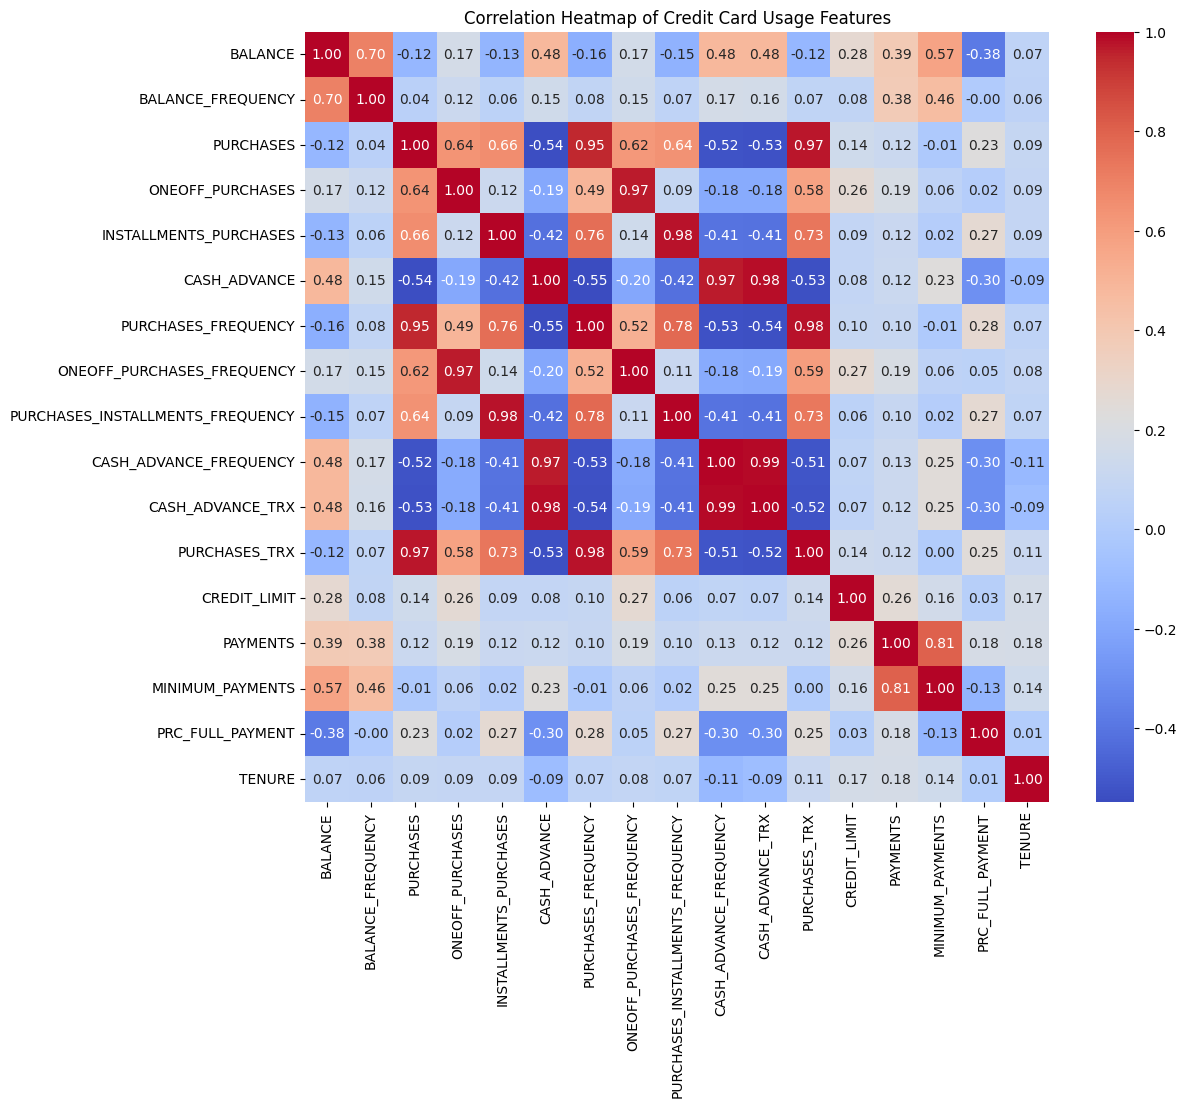

In [250]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(minmax_scaler_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Credit Card Usage Features')
plt.show()

In [251]:
minmax_scaler_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Heatmap shows multiple features are corelated. apply PCA to get uncorrelated variables

**Dimensionality Reduction using Principal Component Analysis**

In [252]:
#PCA
pca = PCA(n_components = 17)
pca.fit(minmax_scaler_df)
pca_df = pca.transform(minmax_scaler_df)

In [253]:
#Determine the optimal number of Principal Components

var_ratio = {}
for n in range(0, 17):
    pc = PCA(n_components = n)
    df_pca = pc.fit(minmax_scaler_df)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_*100)



In [254]:
var_ratio

{0: 0,
 1: 49.72413525043054,
 2: 67.74056946986803,
 3: 81.54447914140762,
 4: 89.19895807543327,
 5: 92.43618740550028,
 6: 94.6687108232442,
 7: 96.7517397421888,
 8: 97.70870080693823,
 9: 98.59168333702078,
 10: 99.05986879820107,
 11: 99.3030009153706,
 12: 99.5217458015324,
 13: 99.70170118889953,
 14: 99.83107720527848,
 15: 99.90992497173231,
 16: 99.95648167876995}

<Axes: >

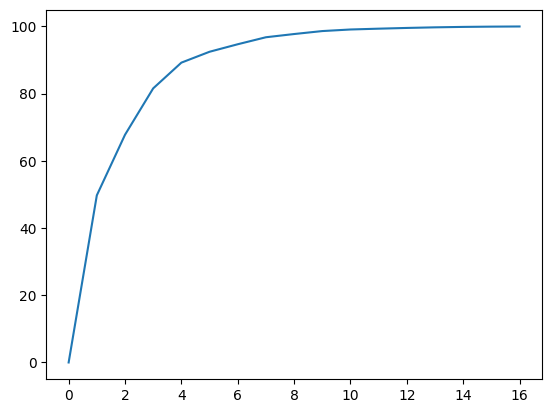

In [255]:
pd.Series(var_ratio).plot()

In [256]:
#Scree plot function
def scree_plot(pca, scaler):
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    plt.figure(figsize = (12,7))
    plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
    plt.plot(range(1, len(per_var)+1), per_var, c = 'red')
    plt.ylabel('Percentage of Explained Variance', size = 13)
    plt.xlabel('Principal Components', size = 13)
    plt.title('Scree Plot (%s)' %(scaler), size = 15)
    plt.grid()
    plt.show()
    print('%s%% variance of the dataset lies on the first 3 Principal Components'  %(np.sum(per_var[:3])))

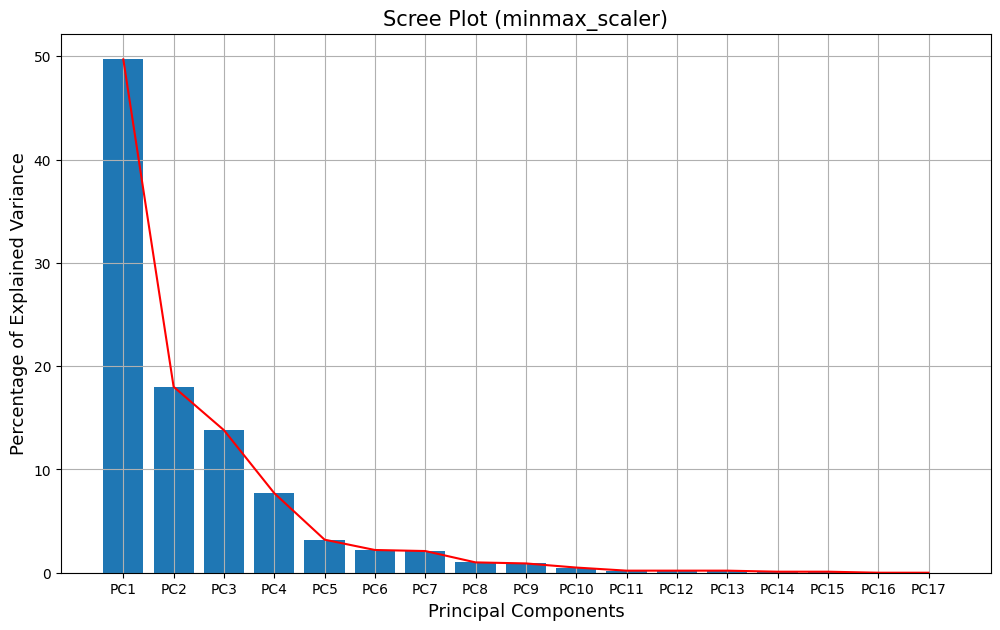

81.5% variance of the dataset lies on the first 3 Principal Components


In [257]:
scree_plot(pca, 'minmax_scaler')

In [258]:
#Use the 3 Principal Components
top3_pc = pca_df[:,:3]

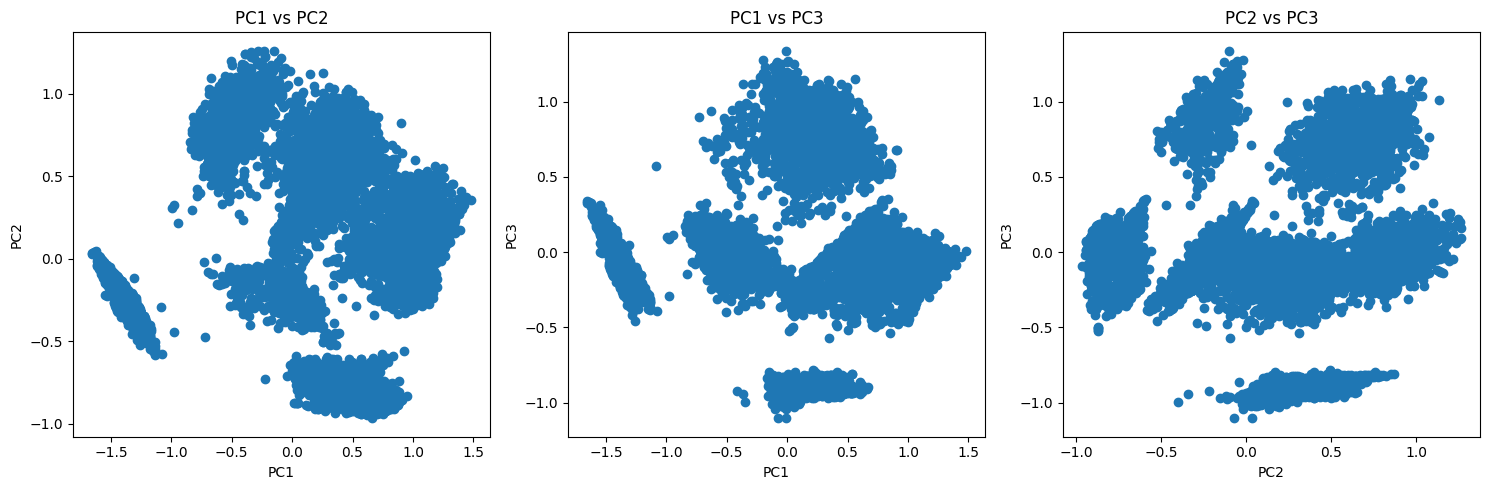

In [259]:
#2D visualization of the 3 Principal Components
x = top3_pc[:, 0]
y = top3_pc[:, 1]
z = top3_pc[:, 2]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')

plt.subplot(1, 3, 2)
plt.scatter(x, z)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3')

plt.subplot(1, 3, 3)
plt.scatter(y, z)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3')

plt.tight_layout()
plt.show()

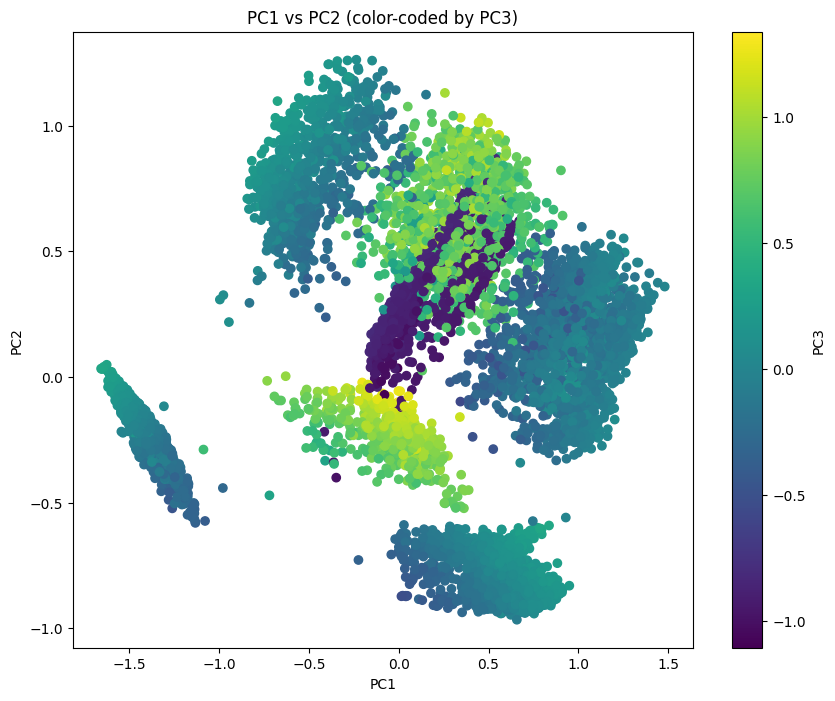

In [260]:
#Combining the 3 Principal Components to 1 scatter plot

plt.figure(figsize=(10, 8))

plt.scatter(x, y, c=z, cmap='viridis')  # Color code points by z-values
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (color-coded by PC3)')
plt.colorbar(label='PC3') # Add colorbar for better understanding of the color mapping


plt.show()

In [261]:
#3D scatter
def scatter_plot3D(pca_df):
    x, y, z = pca_df[:,:3].T
    fig = px.scatter_3d(x = x,
                        y = y,
                        z = z)
    fig.show()

scatter_plot3D(pca_df)

**Select Clustering Model and Algorithm**

Given that we want to capture customer behavior patterns, clustering methods like K-Means, DBSCAN, or Hierarchical Clustering are ideal choices.

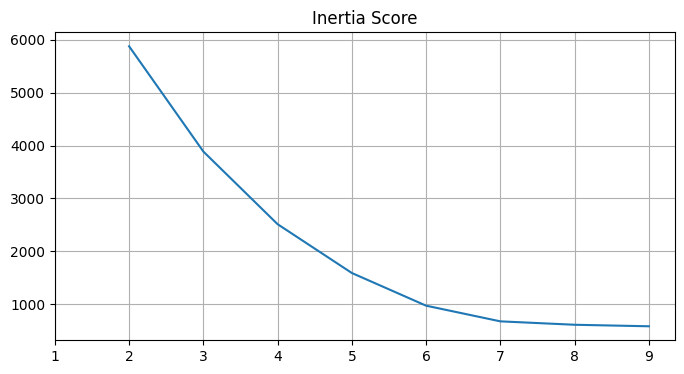

In [230]:
#KMeans Clustering
#For value of K, inertia and silhouette score is used.

inertia = []
silhouette_kmeans = []


for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(top3_pc)
  inertia.append(kmeans.inertia_)
  silhouette_kmeans.append(silhouette_score(top3_pc, kmeans.labels_))


#inertia score figure
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Inertia Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

Elbow Criterion Method: 7 clusters

this method run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

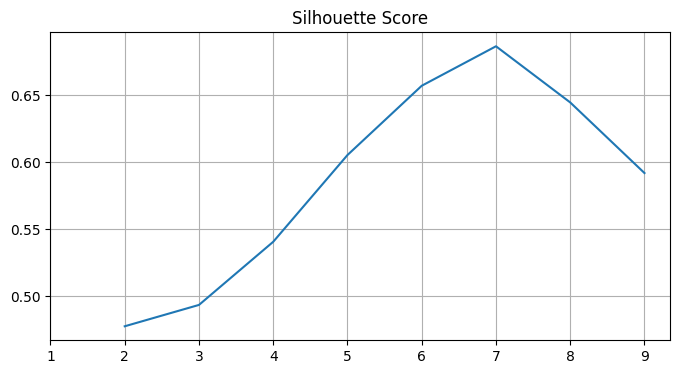

In [262]:
#Silhouette score figure
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silhouette_kmeans)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

**Silhouette Coefficient Method:** 7 clusters.

A higher Silhouette Coefficient score relates to a model with better-defined clusters.

**Conclusion:** 7 Clusters.

because the elbow is lie at 7th cluster in the inertia score, and the highest value in Silhouette Score is also located at 7th cluster

In [263]:
#KMeans Clustering
kmeans = KMeans(n_clusters=7)
kmeans.fit(top3_pc)
kmeans_labels = kmeans.labels_

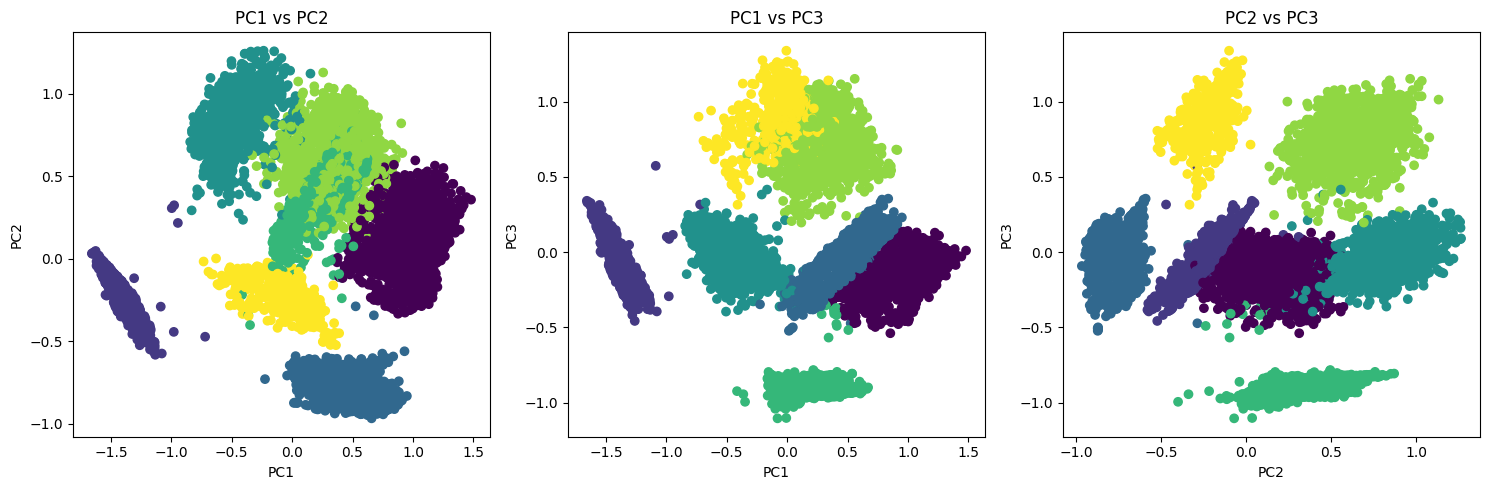

In [264]:
#2D visualization of the 3 Principal Components
x = top3_pc[:, 0]
y = top3_pc[:, 1]
z = top3_pc[:, 2]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, c=kmeans_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')

plt.subplot(1, 3, 2)
plt.scatter(x, z, c=kmeans_labels)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3')

plt.subplot(1, 3, 3)
plt.scatter(y, z, c=kmeans_labels)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3')

plt.tight_layout()
plt.show()

In [265]:
#3D visualization
x, y, z = top3_pc.T

fig = px.scatter_3d(x = x,
                    y = y,
                    z = z,
                    color = kmeans_labels)
fig.show()

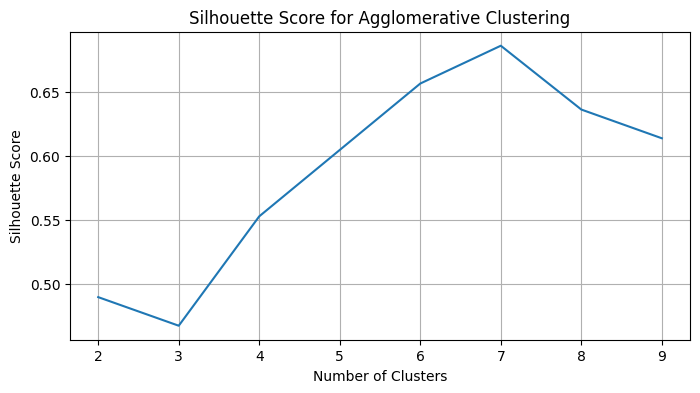

In [266]:
#Agglomerative Clustering
# Finding the best number of clusters using silhouette score

silhouette_agglo = []
for n_clusters in range(2, 10):
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    agg_cluster.fit(top3_pc)
    silhouette_agglo.append(silhouette_score(top3_pc, agg_cluster.labels_))

# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_agglo)
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid()
plt.show()

In [267]:
# Agglomerative Clustering with the optimal number of clusters (7 clusters)
agg_cluster = AgglomerativeClustering(n_clusters=7)
agg_cluster.fit(top3_pc)
agg_labels = agg_cluster.labels_

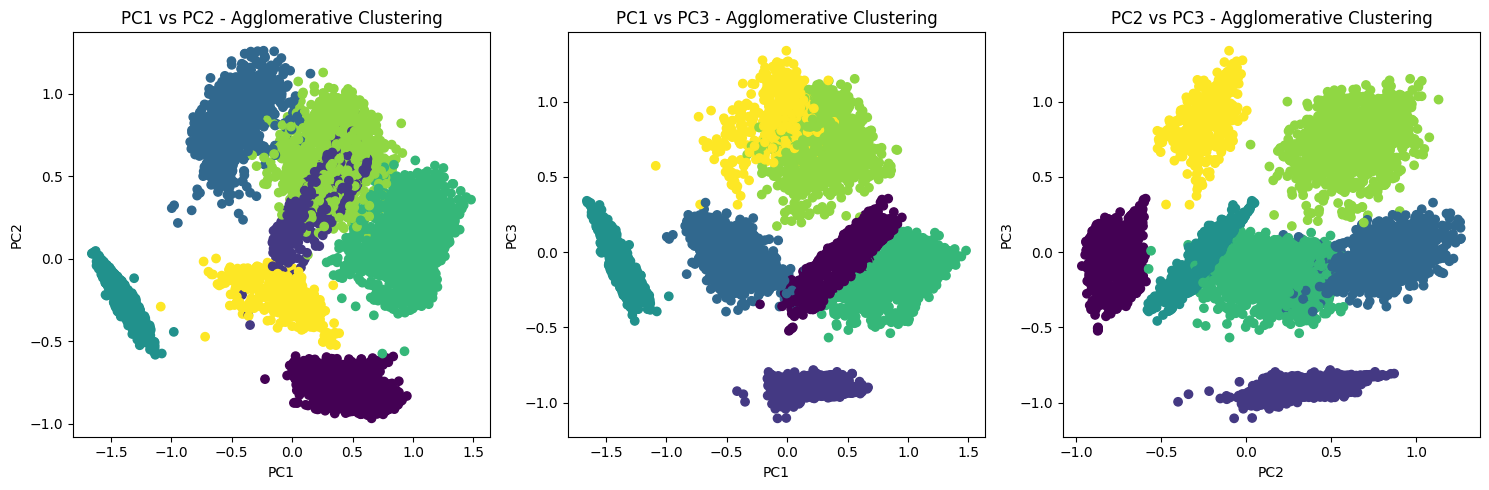

In [268]:
# 2D visualization of the 3 Principal Components with Agglomerative Clustering labels
x = top3_pc[:, 0]
y = top3_pc[:, 1]
z = top3_pc[:, 2]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, c=agg_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 - Agglomerative Clustering')

plt.subplot(1, 3, 2)
plt.scatter(x, z, c=agg_labels)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3 - Agglomerative Clustering')

plt.subplot(1, 3, 3)
plt.scatter(y, z, c=agg_labels)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3 - Agglomerative Clustering')

plt.tight_layout()
plt.show()

In [269]:
# 3D visualization with Agglomerative Clustering labels
x, y, z = top3_pc.T

fig = px.scatter_3d(x=x,
                    y=y,
                    z=z,
                    color=agg_labels,
                    title='3D Scatter Plot - Agglomerative Clustering')
fig.show()

In [270]:
#DBSCAN Clustering
dbscan = DBSCAN(eps = 0.2) # eps = 0.2 is achieved iteratively to get the most reasonable number of clusters.
dbscan.fit(top3_pc)
dbscan_labels = dbscan.labels_ # label/cluster setiap instance

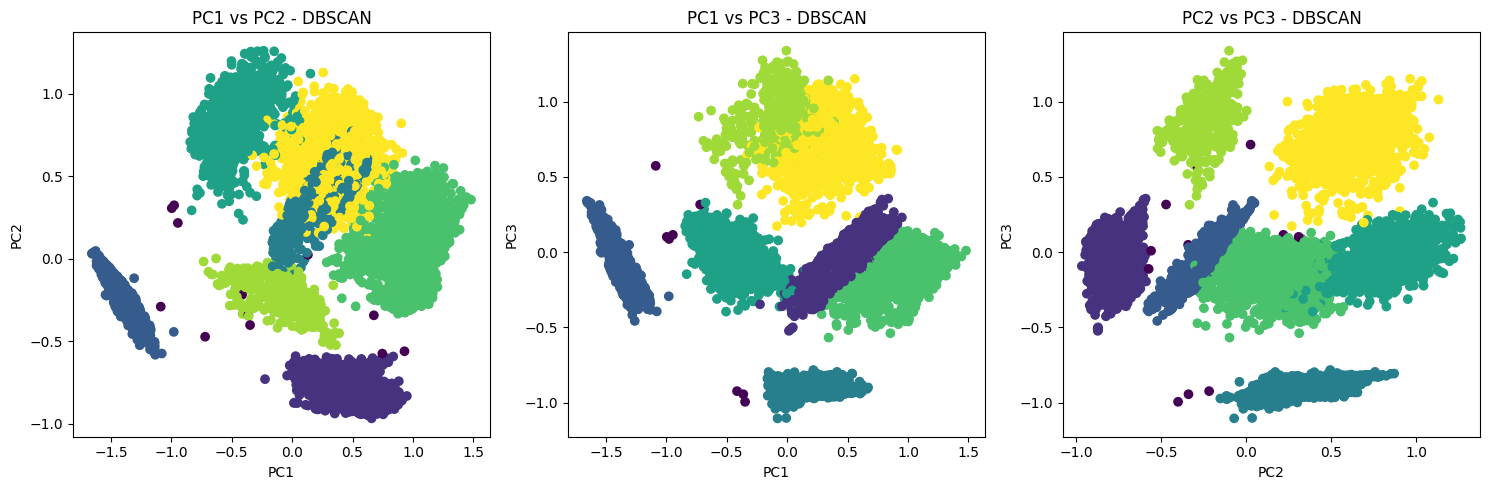

In [271]:
# Visualize the results (similar to KMeans visualization code)
x = top3_pc[:, 0]
y = top3_pc[:, 1]
z = top3_pc[:, 2]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, c=dbscan_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 - DBSCAN')

plt.subplot(1, 3, 2)
plt.scatter(x, z, c=dbscan_labels)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3 - DBSCAN')

plt.subplot(1, 3, 3)
plt.scatter(y, z, c=dbscan_labels)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3 - DBSCAN')

plt.tight_layout()
plt.show()

In [272]:
# 3D visualization
x, y, z = top3_pc.T

fig = px.scatter_3d(x=x,
                    y=y,
                    z=z,
                    color=dbscan_labels,
                    title='3D Scatter Plot - DBSCAN')
fig.show()

Evaluate clustering quality using silhouette score

In [273]:
# Calculate silhouette scores for each clustering method
kmeans_silhouette = silhouette_score(top3_pc, kmeans_labels)
agg_silhouette = silhouette_score(top3_pc, agg_labels)
dbscan_silhouette = silhouette_score(top3_pc, dbscan_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Determine the best clustering method based on the silhouette score
best_method = max([(kmeans_silhouette, "KMeans"), (agg_silhouette, "Agglomerative"), (dbscan_silhouette, "DBSCAN")], key=lambda x: x[0])

print(f"\nBest Clustering Method: \n{best_method[1]} with Silhouette Score: {best_method[0]}")

KMeans Silhouette Score: 0.686522893798625
Agglomerative Clustering Silhouette Score: 0.6858178316373196
DBSCAN Silhouette Score: 0.6833543686053595

Best Clustering Method: 
KMeans with Silhouette Score: 0.686522893798625


Based on the silhouette scores obtained, we can draw the following conclusions:

**Clustering Method Comparison:**

*  **KMeans** achieved the highest silhouette score of 0.6865, indicating that it provided the most well-separated clusters among the three methods.
*  **Agglomerative Clustering** scored slightly lower at 0.6858, showing that it performed comparably to KMeans but with marginally less separation between clusters.

*  **DBSCAN** had a silhouette score of 0.6834, the lowest of the three. This result suggests that DBSCAN’s clusters were somewhat less cohesive or had more overlap, possibly due to varying density in the data, which DBSCAN is sensitive to.

**Best Clustering Method:**


Given the highest silhouette score, **KMeans** is identified as the best clustering method for this dataset. Its high score (close to 1) suggests strong, distinct clustering with minimal overlap, making it an effective choice for this segmentation task.


**Implications for Customer Segmentation:**

KMeans’ clear and slightly higher score indicates it will likely provide the most useful segmentation for understanding customer behaviors in this dataset.
This method offers well-defined clusters, which can facilitate more targeted marketing, accurate risk assessment, and improved customer relationship strategies.

In conclusion, **KMeans** is the recommended clustering model for segmenting credit card customers based on their spending and payment behaviors. Its strong silhouette score reflects well-separated, cohesive clusters, which will be valuable for practical application in customer segmentation efforts.

# **Interpret and Analyze Cluster Profiles**

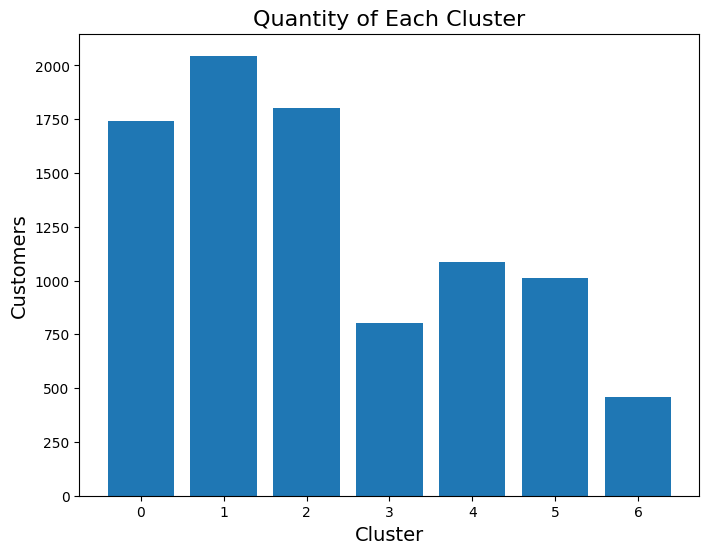

Cluster 0: 1740
Cluster 1: 2045
Cluster 2: 1804
Cluster 3: 804
Cluster 4: 1084
Cluster 5: 1012
Cluster 6: 460


In [279]:
#Calculate Cluster Statistics
labels, counts = np.unique(kmeans_labels, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

In [278]:
#create a file with the label
df_final = df.copy()
df_final['Label'] = kmeans_labels
df_final.to_csv('final_data.csv') # save final dataset for next step, interpretation, conclusion, and recommendation
df_final.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742        627.284787          0.000000   
C10004         7500.0     0.000000          0.000000          0.000000   
C10005         1200.0   678.334763        244.791237          0.000000   

         TENURE  Label  
CUST_ID                 
C10001       12      2  
C10002       12      1  
C10003       12      4  
C10004       12      3  
C10005       12      4

In [280]:
#Describe each cluster
for i in range(7):
    print('Cluster:', i)
    display(df_final[df_final['Label'] == i].describe())
    print('\n')

Cluster: 0


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1740.000000        1740.000000   1740.000000       1740.000000   
mean    1220.881525           0.935343   2484.258443       1519.791874   
std     1819.737542           0.156607   3501.511631       2786.850472   
min        0.000000           0.000000     34.000000          1.400000   
25%      167.319455           1.000000    749.825000        271.630000   
50%      533.733514           1.000000   1538.185000        773.660000   
75%     1518.458175           1.000000   2856.992500       1752.042500   
max    19043.138560           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1740.000000        1740.0          1740.000000   
mean               964.494730           0.0             0.816874   
std               1338.061998           0.0             0.232588   
min                  1.950000           0.0             0.083333   
25%                232.922500           0.0             0.666667   
50%                546.195000           0.0             0.916667   
75%               1176.730000           0.0             1.000000   
max              15497.190000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1740.000000                       1740.000000   
mean                     0.463385                          0.649881   
std                      0.332811                          0.310346   
min                      0.083333                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.408334                          0.666667   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1740.0            1740.0    1740.000000   1740.000000   
mean                      0.0               0.0      34.704023   5713.466562   
std                       0.0               0.0      36.533021   4001.755686   
min                       0.0               0.0       2.000000    300.000000   
25%                       0.0               0.0      13.000000   2500.000000   
50%                       0.0               0.0      24.000000   5000.000000   
75%                       0.0               0.0      42.000000   7500.000000   
max                       0.0               0.0     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1740.000000       1740.000000       1740.000000  1740.000000  1740.0  
mean    2293.289675        610.868334          0.257684    11.807471     0.0  
std     3256.661299       1624.248410          0.357874     0.829482     0.0  
min        0.000000          0.000000          0.000000     6.000000     0.0  
25%      698.994832        169.446775          0.000000    12.000000     0.0  
50%     1345.306081        212.079018          0.000000    12.000000     0.0  
75%     2602.843109        549.842969          0.500000    12.000000     0.0  
max    36066.750680      29019.802880          1.000000    12.000000     0.0



Cluster: 1


BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   2045.000000        2045.000000  2045.000000       2045.000000   
mean    2153.675875           0.882876     0.000034          0.000034   
std     2119.873884           0.231895     0.001149          0.001149   
min        0.000000           0.000000     0.000000          0.000000   
25%      753.703481           0.900000     0.000000          0.000000   
50%     1455.213589           1.000000     0.000000          0.000000   
75%     2843.942194           1.000000     0.000000          0.000000   
max    14581.459140           1.000000     0.050000          0.050000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2045.000000   2045.000000          2045.000000   
mean                 0.042518   1994.138477             0.000126   
std                  1.544925   2472.248061             0.003290   
min                  0.000000     18.042768             0.000000   
25%                  0.000000    380.852744             0.000000   
50%                  0.000000   1209.369868             0.000000   
75%                  0.000000   2706.493856             0.000000   
max                 66.950000  26194.049540             0.090909   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 2045.000000                       2045.000000   
mean                     0.000126                          0.000122   
std                      0.003290                          0.004120   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.000000                          0.000000   
max                      0.090909                          0.166667   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             2045.000000       2045.000000    2045.000000   2045.000000   
mean                 0.272754          6.304645       0.003423   4031.426243   
std                  0.201041          8.078662       0.066268   3269.443304   
min                  0.083333          1.000000       0.000000     50.000000   
25%                  0.090909          2.000000       0.000000   1500.000000   
50%                  0.250000          4.000000       0.000000   3000.000000   
75%                  0.333333          8.000000       0.000000   6000.000000   
max                  1.500000        123.000000       2.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   2045.000000       2045.000000       2045.000000  2045.000000  2045.0  
mean    1655.244249        972.278185          0.044363    11.321271     1.0  
std     2715.813753       2574.175018          0.138180     1.544184     0.0  
min        0.000000          0.000000          0.000000     6.000000     1.0  
25%      360.416137        249.298802          0.000000    12.000000     1.0  
50%      764.938728        471.885081          0.000000    12.000000     1.0  
75%     1730.364781        983.378772          0.000000    12.000000     1.0  
max    34107.074990      61031.618600          1.000000    12.000000     1.0



Cluster: 2


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1804.000000        1804.000000   1804.000000       1804.000000   
mean     398.592191           0.787668    537.079074          0.018315   
std      916.359635           0.300094    886.586469          0.776954   
min        0.000000           0.000000      0.000000          0.000000   
25%       18.270355           0.636364    154.965000          0.000000   
50%       56.075919           1.000000    321.360000          0.000000   
75%      288.875684           1.000000    601.897500          0.000000   
max    11670.179850           1.000000  22500.000000         33.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1804.000000        1804.0          1804.000000   
mean               538.067450           0.0             0.705528   
std                888.588269           0.0             0.306414   
min                  0.000000           0.0             0.083333   
25%                154.965000           0.0             0.416667   
50%                322.145000           0.0             0.833333   
75%                604.620000           0.0             1.000000   
max              22500.000000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1804.000000                       1804.000000   
mean                     0.000185                          0.671907   
std                      0.003921                          0.309206   
min                      0.000000                          0.083333   
25%                      0.000000                          0.416667   
50%                      0.000000                          0.750000   
75%                      0.000000                          1.000000   
max                      0.083333                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1804.0            1804.0    1804.000000   1804.000000   
mean                      0.0               0.0      11.805432   3121.138239   
std                       0.0               0.0      12.180076   2712.773792   
min                       0.0               0.0       0.000000    300.000000   
25%                       0.0               0.0       6.000000   1400.000000   
50%                       0.0               0.0      10.000000   2500.000000   
75%                       0.0               0.0      12.000000   4000.000000   
max                       0.0               0.0     199.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1804.000000       1804.000000       1804.000000  1804.000000  1804.0  
mean     748.728568        680.650554          0.306385    11.509424     2.0  
std     1329.716714       3243.687768          0.368776     1.372586     0.0  
min        0.000000          0.000000          0.000000     6.000000     2.0  
25%      208.655774        108.813746          0.000000    12.000000     2.0  
50%      419.418415        163.036039          0.095454    12.000000     2.0  
75%      825.695754        217.010143          0.600000    12.000000     2.0  
max    28988.973880      76406.207520          1.000000    12.000000     2.0



Cluster: 3


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    804.000000         804.000000    804.000000        804.000000   
mean    2332.116133           0.923417    661.071530        660.831679   
std     2271.592390           0.174668   1497.048804       1497.096309   
min        0.000000           0.000000      0.700000          0.700000   
25%      816.313793           1.000000    114.155000        114.155000   
50%     1600.350201           1.000000    296.500000        296.500000   
75%     3116.558155           1.000000    720.600000        720.600000   
max    15258.225900           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              804.000000    804.000000           804.000000   
mean                 0.283035   2015.911075             0.275573   
std                  4.538610   2476.547218             0.252572   
min                  0.000000     18.280043             0.083333   
25%                  0.000000    367.425769             0.083333   
50%                  0.000000   1138.401787             0.166667   
75%                  0.000000   2745.786312             0.333333   
max                103.880000  20277.331120             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  804.000000                        804.000000   
mean                     0.275366                          0.000489   
std                      0.252696                          0.007150   
min                      0.083333                          0.000000   
25%                      0.083333                          0.000000   
50%                      0.166667                          0.000000   
75%                      0.333333                          0.000000   
max                      1.000000                          0.142857   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              804.000000        804.000000     804.000000    804.000000   
mean                 0.292519          6.820896       6.287313   4622.667345   
std                  0.212246          7.727634      13.487905   3495.941761   
min                  0.083333          1.000000       1.000000    200.000000   
25%                  0.142857          2.000000       1.000000   1987.500000   
50%                  0.250000          4.000000       3.000000   3450.000000   
75%                  0.416667          9.000000       7.000000   6500.000000   
max                  1.250000         93.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Label  
count    804.000000        804.000000        804.000000  804.000000  804.0  
mean    1910.424994        991.348672          0.057587   11.348259    3.0  
std     2906.525630       1664.230553          0.165666    1.521325    0.0  
min        0.000000          0.000000          0.000000    6.000000    3.0  
25%      480.378702        244.062670          0.000000   12.000000    3.0  
50%     1067.160999        533.069335          0.000000   12.000000    3.0  
75%     2185.613015       1144.611880          0.000000   12.000000    3.0  
max    39461.965800      19060.534750          1.000000   12.000000    3.0



Cluster: 4


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1084.000000        1084.000000   1084.000000       1084.000000   
mean     761.385342           0.768659    874.372749        874.007897   
std     1178.933402           0.304491   1398.825474       1399.025745   
min        0.000000           0.000000      0.010000          0.010000   
25%       44.087865           0.545455    150.000000        149.887500   
50%      245.268294           1.000000    437.805000        435.940000   
75%     1089.196875           1.000000   1023.080000       1023.080000   
max    12323.845360           1.000000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1084.000000        1084.0          1084.000000   
mean                 0.451504           0.0             0.352508   
std                  5.048241           0.0             0.312450   
min                  0.000000           0.0             0.083333   
25%                  0.000000           0.0             0.083333   
50%                  0.000000           0.0             0.236111   
75%                  0.000000           0.0             0.500000   
max                106.970000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1084.000000                       1084.000000   
mean                     0.351790                          0.001109   
std                      0.312835                          0.010372   
min                      0.083333                          0.000000   
25%                      0.083333                          0.000000   
50%                      0.222222                          0.000000   
75%                      0.500000                          0.000000   
max                      1.000000                          0.166667   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1084.0            1084.0    1084.000000   1084.000000   
mean                      0.0               0.0       7.677122   4422.841888   
std                       0.0               0.0      13.739261   3614.781349   
min                       0.0               0.0       0.000000    150.000000   
25%                       0.0               0.0       1.000000   1600.000000   
50%                       0.0               0.0       4.000000   3000.000000   
75%                       0.0               0.0      10.000000   6500.000000   
max                       0.0               0.0     217.000000  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1084.000000       1084.000000       1084.000000  1084.000000  1084.0  
mean    1191.039662        476.966500          0.134404    11.553506     4.0  
std     2336.538055       1590.631835          0.291630     1.278379     0.0  
min        0.000000          0.000000          0.000000     6.000000     4.0  
25%      285.646717        110.465810          0.000000    12.000000     4.0  
50%      572.172550        188.098563          0.000000    12.000000     4.0  
75%     1273.133283        410.594686          0.083333    12.000000     4.0  
max    50721.483360      30528.432400          1.000000    12.000000     4.0



Cluster: 5


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1012.000000        1012.000000   1012.000000       1012.000000   
mean    2838.387763           0.970120   1938.609822       1165.128715   
std     2617.941642           0.089857   2535.797505       1938.815928   
min        2.299436           0.181818     64.820000          0.020000   
25%      898.144287           1.000000    612.172500        227.065000   
50%     2014.049593           1.000000   1243.580000        616.625000   
75%     4017.065867           1.000000   2394.680000       1407.717500   
max    16259.448570           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1012.000000   1012.000000          1012.000000   
mean               773.784634   2091.708367             0.780558   
std               1036.273615   3109.109798             0.244183   
min                  9.650000     14.222216             0.083333   
25%                186.502500    397.425614             0.583333   
50%                447.230000   1130.336826             0.875000   
75%               1021.405000   2650.504279             1.000000   
max              13184.430000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1012.000000                       1012.000000   
mean                     0.397527                          0.630515   
std                      0.289533                          0.308479   
min                      0.083333                          0.083333   
25%                      0.166667                          0.375000   
50%                      0.333333                          0.666667   
75%                      0.583333                          0.916667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1012.000000       1012.000000    1012.000000   1012.000000   
mean                 0.292225          7.750000      30.568182   5819.675011   
std                  0.213466          9.740945      29.750467   4139.102367   
min                  0.083333          1.000000       2.000000    300.000000   
25%                  0.090909          2.000000      11.000000   2500.000000   
50%                  0.250000          4.500000      21.000000   5000.000000   
75%                  0.416667         10.000000      39.000000   8000.000000   
max                  1.000000        123.000000     308.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1012.000000       1012.000000       1012.000000  1012.000000  1012.0  
mean    3023.259338       1237.123901          0.069474    11.619565     5.0  
std     4088.312470       1767.758520          0.176262     1.188692     0.0  
min        0.000000          0.000000          0.000000     6.000000     5.0  
25%      879.043044        328.232419          0.000000    12.000000     5.0  
50%     1747.866882        741.987527          0.000000    12.000000     5.0  
75%     3539.576179       1452.988501          0.083333    12.000000     5.0  
max    46930.598240      22011.779800          1.000000    12.000000     5.0



Cluster: 6


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    460.000000         460.000000    460.000000        460.000000   
mean    2568.605387           0.956652    534.756826          0.000022   
std     2594.263464           0.125205    847.334096          0.000466   
min        1.097736           0.181818      4.440000          0.000000   
25%      879.346363           1.000000    158.067500          0.000000   
50%     1629.791663           1.000000    335.995000          0.000000   
75%     3344.281991           1.000000    625.670000          0.000000   
max    16304.889250           1.000000  14686.100000          0.010000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              460.000000    460.000000           460.000000   
mean               535.406348   2054.554450             0.653573   
std                847.252725   2545.640406             0.313629   
min                  4.440000     18.531069             0.083333   
25%                158.067500    507.772247             0.356060   
50%                336.990000   1133.902290             0.707143   
75%                625.670000   2682.999427             1.000000   
max              14686.100000  19862.878440             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  460.000000                        460.000000   
mean                     0.000181                          0.606247   
std                      0.003885                          0.314303   
min                      0.000000                          0.083333   
25%                      0.000000                          0.333333   
50%                      0.000000                          0.666667   
75%                      0.000000                          0.909091   
max                      0.083333                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              460.000000        460.000000     460.000000    460.000000   
mean                 0.262339          6.208696      12.286957   4356.739130   
std                  0.197822          8.951815      19.504992   3614.767613   
min                  0.083333          1.000000       1.000000    500.000000   
25%                  0.083333          2.000000       5.000000   1500.000000   
50%                  0.166667          4.000000       9.000000   3000.000000   
75%                  0.333333          7.000000      13.000000   6000.000000   
max                  1.000000        123.000000     347.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Label  
count    460.000000        460.000000        460.000000  460.000000  460.0  
mean    1954.383558       1431.422757          0.047027   11.319565    6.0  
std     3076.065407       2524.702344          0.128253    1.614223    0.0  
min        0.000000          0.000000          0.000000    6.000000    6.0  
25%      577.127243        344.167441          0.000000   12.000000    6.0  
50%     1131.976678        798.641580          0.000000   12.000000    6.0  
75%     2052.086325       1573.285404          0.000000   12.000000    6.0  
max    40627.595240      31871.363790          1.000000   12.000000    6.0

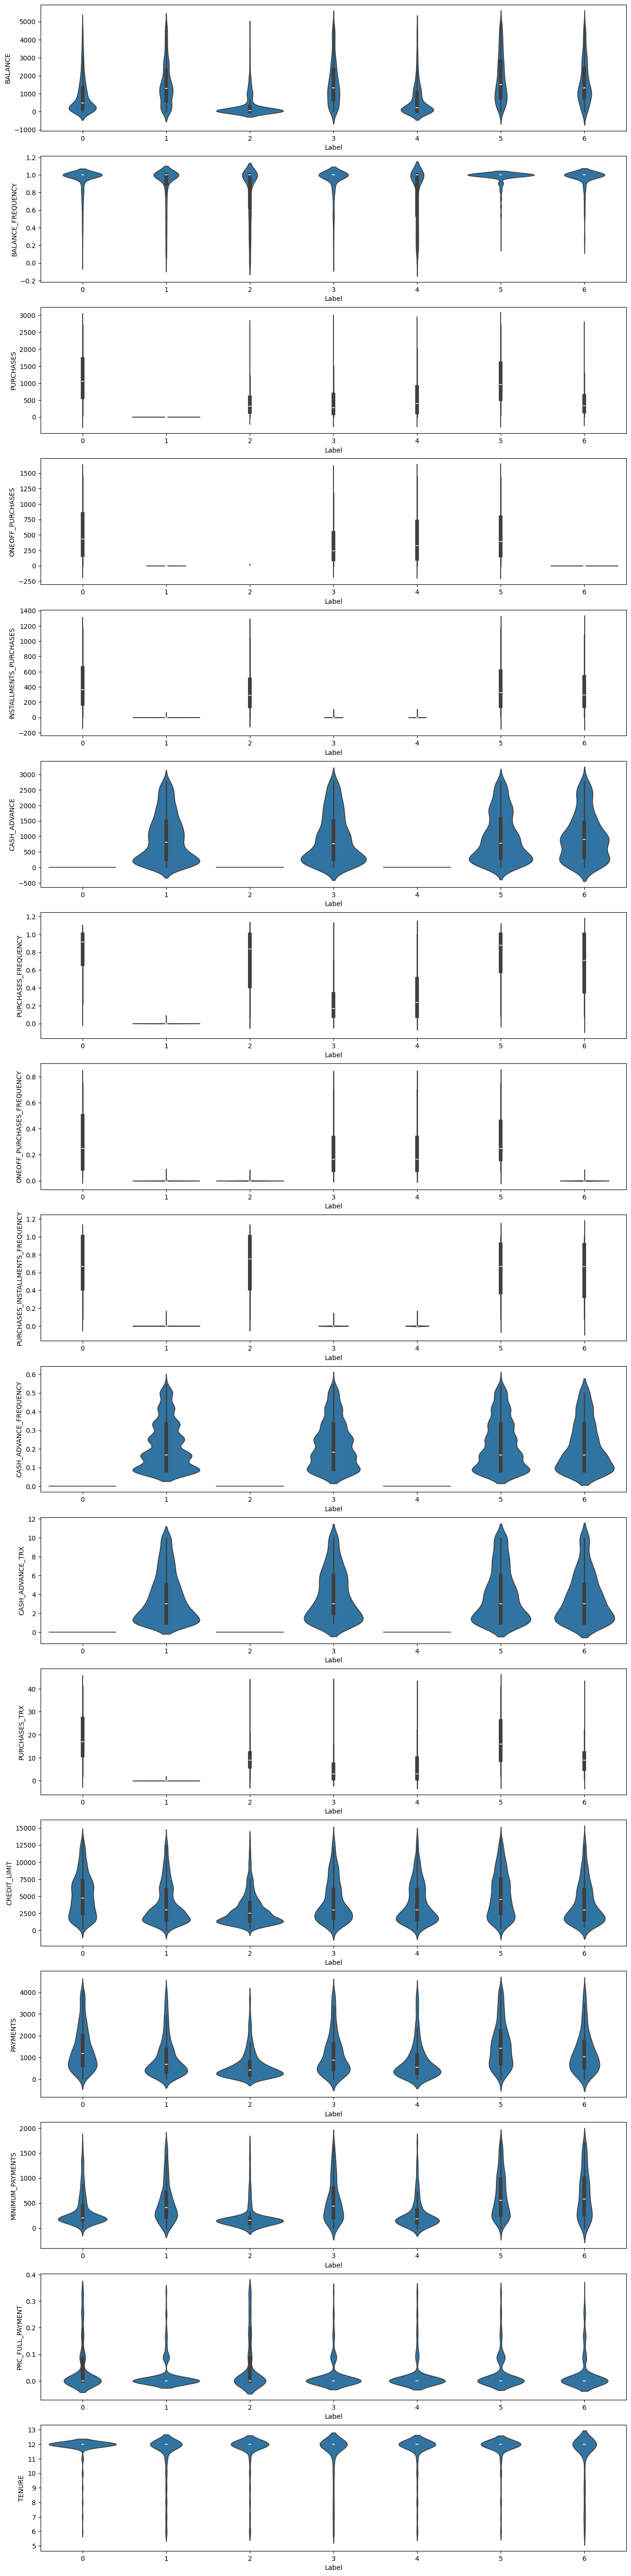

In [287]:
#Violin Plots
fig, axs = plt.subplots(nrows = 17, ncols = 1, figsize = (16,70))
for i in range(17):
    q1, q3 = np.quantile(df_final.iloc[:,i], [0.25, 0.75])
    sns.violinplot(data = df_final[['Label', df_final.columns[i]]].loc[df_final[df_final.columns[i]] <= (q3 + 1.5*(q3-q1))], x = 'Label', y = df_final.columns[i], ax = axs[i])

plt.show()

# **Cluster Insights and recommendations:**

**Cluster 0:** Moderate Spenders with Stable Usage

This cluster likely represents average spenders with moderate credit use and lower dependency on cash advances, suggesting a stable and reliable customer group.


*   **Loyalty Programs:** Offer points-based or cashback rewards to encourage continued usage and build loyalty.
*  **Cross-Sell Opportunities:** Introduce additional financial products like personal loans or savings accounts that may appeal to moderate spenders.


**Cluster 1:**  High Credit Limit & Low Usage

This group may represent inactive or conservative users with high credit limits but minimal spending. They may need engagement to increase activity or represent low-risk, low-revenue customers.


*   **Re-engagement Campaign:** Offer incentives like cashback on the first purchase or waiver of annual fees to encourage card usage.
*  **Usage-Based Promotions:** Create targeted campaigns to incentivize specific spending categories, such as travel or dining, which may appeal to more conservative or inactive users.



**Cluster 2:** Low Income / Newer Users with Low Balances and Credit Limits

This cluster likely represents new or low-income users who have lower balances and credit limits. They may benefit from incentives to increase engagement or credit limits.


*  **Introductory Offers:** Provide promotions, like introductory 0% interest on purchases, to help these newer customers get accustomed to using their credit cards.
*  **Gradual Credit Limit Increases:** Based on payment history, consider offering small, incremental credit limit increases to build customer trust and engagement.



**Cluster 3:** High-Spending, High-Engagement Customers with Cash Advance Dependency

 This cluster likely represents high-value, high-spending customers with high credit limits. However, their frequent use of cash advances could indicate liquidity needs, and they may need monitoring for credit risk or engagement for premium services.


*  ** Premium Credit Card Options:** Offer upgrades to premium cards with additional perks like travel rewards, concierge services, or access to exclusive events to deepen engagement.


**Cluster 4:** Mid-Tier Stable Spenders with Low Cash Advance Dependency

This cluster could represent middle-income customers with stable spending patterns and little need for cash advances. They may be prime candidates for targeted offers to increase loyalty.


*  **Upgrade Incentives:** Encourage these stable users to upgrade to a higher-tier card by offering benefits like rewards points, annual fee waivers, or travel-related perks.
*   **Increase Engagement:** Target them with campaigns for higher spend categories, like travel or luxury, or incentivize certain types of purchases (e.g., dining, entertainment) to increase card usage.



**Cluster 5:** Long-Term, Low-Spending Customers with Low Balances

This cluster represents low-engagement, low-risk customers who do not spend much or use their credit cards actively. They may benefit from reactivation campaigns or low-cost service offers to boost engagement.


*   **Retention Strategies:** Offer them fee waivers or basic loyalty points to keep them engaged and prevent attrition, as they are likely low-risk but also low-revenue customers.
*   **Simple Upgrade Offers:** Provide low-cost upgrade options that give modest rewards, appealing to conservative spenders.


**Cluster 6:** High-Value, High-Spending Customers with Frequent Cash Advances


This cluster represents a high-value segment with very high spending and credit use, including frequent cash advances. They are prime candidates for premium services and loyalty rewards but may need careful monitoring due to high credit usage.


*   **Exclusive Benefits:** Offer highly personalized rewards and services, like concierge services, airport lounge access, or exclusive event invitations. Consider assigning a dedicated relationship manager.
*   **Financial Management Services:** Given the frequent use of cash advances, they may benefit from specialized financial management services. Offer advisory services or access to personal loans as an alternative to cash advances.




# **Summary of Recommendations**

**Cluster 0 & 4:** Mid-tier customers, stable users who may respond well to loyalty rewards.

**Cluster 1 & 5:** Low-spending or inactive users, candidates for re-engagement campaigns.

**Cluster 2:** New or low-limit customers, could benefit from increased credit limits and introductory offers.

**Cluster 3 & 6:** High-value customers with premium credit usage and cash advance dependency; ideal for premium service offers but require close risk monitoring.


Each cluster’s unique behavior warrants a targeted approach to maximize customer satisfaction, reduce credit risk, and improve overall profitability for the bank. By tailoring offerings and engagement strategies to each segment’s needs, the bank can strengthen customer relationships and optimize its credit card portfolio.






